<a href="https://colab.research.google.com/github/DethSaucin/advanced-machine-learning/blob/main/sethDawson_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Improving Computer Vision Accuracy using Convolutions

In the previous lessons you saw how to do fashion recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer. You experimented with the impact of different sizes of hidden layer, number of training epochs etc on the final accuracy.

For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end.

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 22s 10ms/step - loss: 0.4968 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3701 - accuracy: 0.8669
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3323 - accuracy: 0.8795
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3073 - accuracy: 0.8868
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3491 - accuracy: 0.8723


Your accuracy is probably about 89% on training and 87% on validation...not bad...But how do you make that even better? One way is to use something called Convolutions. I'm not going to details on Convolutions here, but the ultimate concept is that they narrow down the content of the image to focus on specific, distinct, details.

If you've ever done image processing using a filter (like this: https://en.wikipedia.org/wiki/Kernel_(image_processing)) then convolutions will look very familiar.

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

This is perfect for computer vision, because often it's features that can get highlighted like this that distinguish one item for another, and the amount of information needed is then much less...because you'll just train on the highlighted features.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

Run the below code -- this is the same neural network as earlier, but this time with Convolutional layers added first. It will take longer, but look at the impact on the accuracy:

In [2]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


2.14.0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)       

It's likely gone up to about 93% on the training data and 91% on the validation data.

That's significant, and a step in the right direction!

Try running it for more epochs -- say about 20, and explore the results! But while the results might seem really good, the validation results may actually go down, due to something called 'overfitting' which will be discussed later.

(In a nutshell, 'overfitting' occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at seeing *other* data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it, but blue suade shoes might confuse you...and you know you should never mess with my blue suede shoes.)

Then, look at the code again, and see, step by step how the Convolutions were built:

Step 1 is to gather the data. You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape.



```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```


Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

1. The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32
2. The size of the Convolution, in this case a 3x3 grid
3. The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
4. In the first layer, the shape of the input data.

You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.

You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way.


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```


Add another convolution



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
```


Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version

```
  tf.keras.layers.Flatten(),
```


The same 128 dense layers, and 10 output layers as in the pre-convolution example:



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```


Now compile the model, call the fit method to do the training, and evaluate the loss and accuracy from the test set.



```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```


# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [3]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 37ms/step


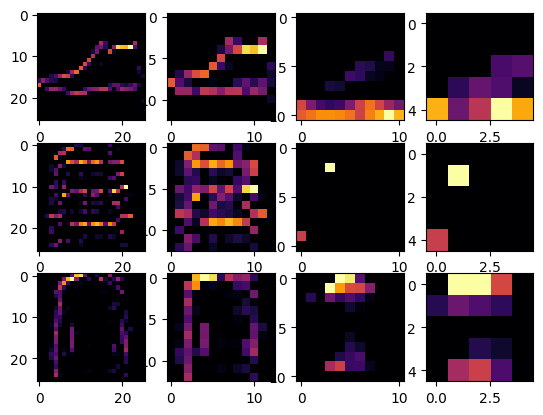

In [4]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [5]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.14.0
11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 38s 19ms/step - loss: 0.1517 - accuracy: 0.9556
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0547 - accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0366 - accuracy: 0.9886
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0169 - accuracy: 0.9947
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0121 - accuracy: 0.9960
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0084 - accuracy: 0.9972
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0069 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0055 - accuracy:

1. Change the convolutional layer configurations: change the number of filters in the convolutional layers to 16 and 64.

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

The impact will likely be a reduction in the number of parameters (and hence training time) but a potential decrease in accuracy compared to the original model. Smaller filter sizes generally capture fewer features, while larger filter sizes can capture more complex features.

Adjusting the filter count in the convolutional layers of a neural network, as I did by testing configurations of 16 and 64 filters, significantly influences model accuracy and training efficiency. A decrease to 16 filters risks reducing the model's ability to capture detailed patterns, potentially lowering accuracy, while fewer filters can speed up training by simplifying computations. Nevertheless, prioritizing speed may undermine accuracy, highlighting the importance of finding a balance tailored to the specific demands of the dataset and task. Optimal filter selection, therefore, emerges from iterative experimentation and careful evaluation against the validation set.

2. Remove the final Convolutional Layer:

Eliminating the last convolutional layer streamlines the network, potentially accelerating the training process. However, this simplification might compromise the model's capacity to discern complex patterns, which could slightly diminish its accuracy.

In [7]:
# Question 2: Removing the final Convolutional Layer
print("\nQuestion 2: Removing the final Convolutional Layer")

# Remove the final convolutional layer.
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()


Question 2: Removing the final Convolutional Layer
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 10816)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               1384576   
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)



Removing the final convolutional layer from the model will lead to a trade-off between accuracy and training time.

As the model's complexity is reduced, its proficiency in identifying detailed features may be impaired, potentially leading to diminished performance on training and validation datasets. Nonetheless, this simplification could enhance training efficiency due to decreased computational demands.

This alteration's effect must be evaluated against the backdrop of the dataset and the particular challenge at hand. It's advisable to conduct thorough experimentation and validation of the model's performance to judiciously determine if the trade-off of reduced accuracy for quicker training is justifiable.

In [8]:
# Question 3: Adding more Convolutional Layers
print("\nQuestion 3: Adding more Convolutional Layers")

# Add more convolutional layers.
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.summary()


Question 3: Adding more Convolutional Layers
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 256)         295168    
                                                                 
 max_poo

Adding more convolutional layers may increase the capacity of the model to learn intricate features and patterns, but it might also increase training time.

Incorporating extra convolutional layers into a model may yield mixed outcomes. The benefits include a heightened proficiency for the model to identify detailed features, which could improve accuracy, particularly with complex datasets. Nonetheless, this enhancement introduces greater computational demands, which extend training duration and elevate the potential for overfitting. Overfitting can cause the model to perform exceptionally on training data but poorly on unseen data. Thus, a careful process of experimentation and validation is indispensable to strike an equilibrium between the model's depth and its operational efficiency. Since the ideal number of layers is contingent on the specific problem and dataset, close observation of both training and validation metrics is vital for model optimization.

4. Remove all Convolutions but the first:

In [9]:
# Question 4: Removing all Convolutions but the first
print("\nQuestion 4: Removing all Convolutions but the first")

# Keep only the first convolutional layer.
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the output for Question 4
model.summary()


Question 4: Removing all Convolutions but the first
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 10816)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               1384576   
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)

Stripping the model down to only the initial convolution significantly streamlines its architecture, leading to quicker training due to a reduction in parameters. However, this comes at the cost of a diminished ability to learn and identify complex features. The consequences are threefold:

1. **Streamlined Complexity:**  There's a notable simplification in the model's structure, rendering it less adept at capturing detailed patterns.

2. **Faster Training:** Shorter training time due to fewer parameters.

3. **Limited Depth:** The model's reduced depth could adversely affect its accuracy, particularly with datasets that contain more complex patterns.

The extent to which accuracy and training efficiency are affected will vary according to the intricacies of the dataset in use and the performance requirements of the model.

In [10]:
# Question 5: Implementing a callback to check loss and stop training
print("\nQuestion 5: Implementing a callback to check loss and stop training")

# Define a custom callback to monitor the loss.
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.1:
            print("\nLoss is below 0.1. Stopping training.")
            self.model.stop_training = True


custom_callback = CustomCallback()

# Compile the model and fit it with the custom callback.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=20, callbacks=[custom_callback])

print("Training completed or stopped.")



Question 5: Implementing a callback to check loss and stop training
Epoch 1/20
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1417 - accuracy: 0.9571
Epoch 2/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0486 - accuracy: 0.9853
Loss is below 0.1. Stopping training.
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0486 - accuracy: 0.9853
Training completed or stopped.


Training will be interrupted when the loss dips below 0.1, courtesy of a CustomCallback that keeps an eye on the loss after each epoch during neural network training. This callback's role is to check whether the loss has undercut the 0.1 threshold. Should this occur, it signals the condition has been met by displaying a message and then triggers a training halt by activating the stop_training attribute on the model. To weave this custom logic into the model's training, a custom_callback instance is created and passed to the model's fit function via the callbacks list. As the training unfolds across epochs, and the loss reaches the preset limit, the callback springs into action, effectively ceasing the training. Upon the conclusion of the training, whether by completion or early stoppage, a notification is relayed, confirming the end of the training regime. Integrating such a custom callback grants granular control over training, offering a strategic tool like early stopping to refine and optimize the training process.